In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir

'.\\datasets\\flower_photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

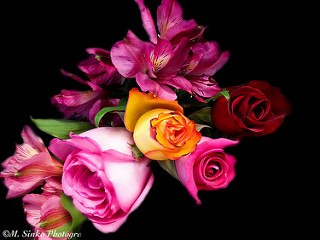

In [7]:
PIL.Image.open(str(roses[6]))

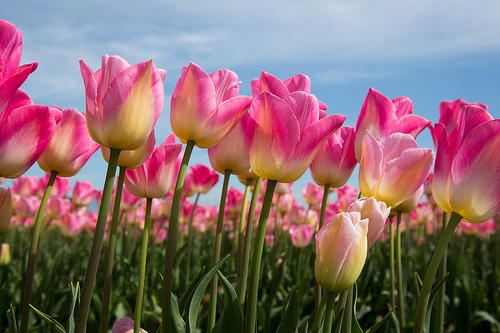

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [9]:
flowers_img_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
str(flowers_img_dict['roses'][6])

'datasets\\flower_photos\\roses\\11233672494_d8bf0a3dbf_n.jpg'

In [12]:
img = cv2.imread(str(flowers_img_dict['roses'][0]))
img[:3]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]]], shape=(3, 179, 3), dtype=uint8)

In [13]:
img.shape

(240, 179, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =0)

In [17]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
cnn = keras.Sequential([
    layers.Conv2D(16,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train_scaled,y_train, epochs =10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 324ms/step - accuracy: 0.4404 - loss: 1.3525
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 303ms/step - accuracy: 0.6114 - loss: 1.0110
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 315ms/step - accuracy: 0.6918 - loss: 0.8085
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 312ms/step - accuracy: 0.7640 - loss: 0.6398
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 307ms/step - accuracy: 0.8321 - loss: 0.4857
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 309ms/step - accuracy: 0.8982 - loss: 0.3050
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.9346 - loss: 0.2029
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 358ms/step - accuracy: 0.9724 - loss: 0.0976
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 318ms/step - accuracy: 0.9768 - loss: 0.0685
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 298ms/step - accuracy: 0.9884 - loss: 0.0447


In [19]:
cnn.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6703 - loss: 1.7418


[1.7418150901794434, 0.6702997088432312]

In [20]:
predictions = cnn.predict(X_test_scaled)
predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


array([[1.5009749e-11, 1.0000000e+00, 3.2451617e-09, 4.6736049e-16,
        1.2111258e-13],
       [9.9985600e-01, 5.6724264e-05, 6.1847999e-08, 4.4258727e-06,
        8.2705963e-05],
       [1.8819650e-05, 2.7295349e-02, 9.7267836e-01, 6.3871635e-06,
        1.0311251e-06],
       ...,
       [2.7878339e-11, 1.0000000e+00, 5.9178767e-10, 1.2302635e-10,
        3.1138153e-08],
       [6.8884826e-01, 1.5818523e-02, 6.9182268e-03, 2.8732195e-01,
        1.0930283e-03],
       [4.3618568e-04, 7.8850455e-04, 9.9870574e-01, 3.4507400e-07,
        6.9184309e-05]], shape=(734, 5), dtype=float32)

In [21]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.14884758, 0.40460962, 0.14884758, 0.14884758, 0.14884758],
      dtype=float32)>

In [22]:
np.argmax(score)

np.int64(1)

In [ ]:
data_aug = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(180, 180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
]) 

(np.float64(-0.5), np.float64(179.5), np.float64(179.5), np.float64(-0.5))

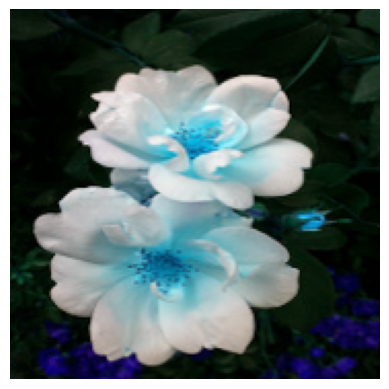

In [24]:
plt.imshow(X[0])
plt.axis('off')

In [25]:
model = keras.Sequential([
  data_aug,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 336ms/step - accuracy: 0.4421 - loss: 1.2963
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 345ms/step - accuracy: 0.5896 - loss: 1.0236
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - accuracy: 0.6226 - loss: 0.9504
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.6662 - loss: 0.8721
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 336ms/step - accuracy: 0.6887 - loss: 0.8139
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 341ms/step - accuracy: 0.7044 - loss: 0.7568
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 326ms/step - accuracy: 0.7095 - loss: 0.7240
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 322ms/step - accuracy: 0.7255 - loss: 0.7044
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - accuracy: 0.7476 - loss: 0.6557
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 425ms/step - accuracy: 0.7520 - loss: 0.6239
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 378ms/step - accuracy: 0.7568 - loss: 0.6343
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 35

In [27]:
model.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7357 - loss: 0.7399


[0.7398502230644226, 0.7356948256492615]